##Numerical Optimization
What you'll learn from today's class
1.  Factors that can complicate numerical optimization
2.  How complications limit the effectiveness of gradient descent
3.  How Newton's method can overcome some complications of optimization
4.  Approximate methods with lower overhead than Newton's method

Order of today's topics
1.  Simple example that illustrates the half-pipe problem
2.  Newton's method.  How does it deal with half-pipe?
3.  Why not use Newton's method for full-scale problems.
4.  First order methods approximating Newton's method.  

#Problems with Gradient Descent

In the first lecture, you saw how to construct a simple neural net classifier, how to define its numeric performance (average mean squared error), to choose random weights as a starting point and then to use gradient descent to train the neural network - that is to determine the values for the weights minimizing the network's error.  The numeric error (the function J) was a function of the weights and you used gradient descent to minimize it.  Minimizing a function of some parameters occurs in other situations besides neural nets (for example training support vector machines or penalized regression or minimizing the cost of running a flexible manufacturing facility).  

There has been considerable attention and development of techniques for finding minima and maxima.  Why?  Gradient descent seemed to work so well.  Here is an example that illustrates how gradient descent can get off track.  Suppose that the matrix A is symmetric and positive definite and that the vector b has the same dimension as the number of rows in A.  Let w be a vector (of weights).  Recall that a matrix being symmetric means that it equals its transpose and being positive definite means that for any choice for the vector $w$,  $w^TAw > 0$.  This expression is called a quadratic form.  Why introduce the quadratic form?  There are two reasons.  One is that you're learning about minimizing functions and this simple function can be used to illustrate the pathologies that can occur in determining neural network weights. The second is that the quadratic form can serve as a useful approximation to the actual function you're tying to optimize.  That's called Newton's method and will be covered a little later in this lecture.  

First here's a simple version of the quadratic form as a starter.  Suppose the function J that you're trying to minimize is given by: 

\begin{equation} J = \frac12\begin{bmatrix}
w_1&w_2 \end{bmatrix}\begin{bmatrix}
1.0&0.0\\
0.0&1.0
\end{bmatrix}\begin{bmatrix}
w_1\\
w_2
\end{bmatrix} = \frac12 (w_1^2 + w_2^2)\end{equation}

Use gradient descent to minimize J.  In the code below you will see two variables a11 and a22.  Those are the 1,1 and 2,2 elements from the matrix A.  These are the diagonal elements from the matrix above.  With the parameters as is, the gradient descent converges nicely and the program plots the trajectory of the function J and of the weights $w_1$ and $w_2$.  

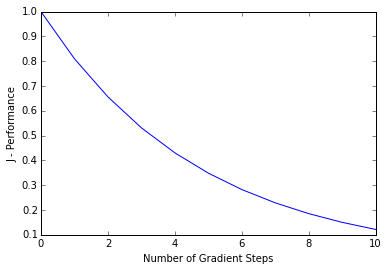

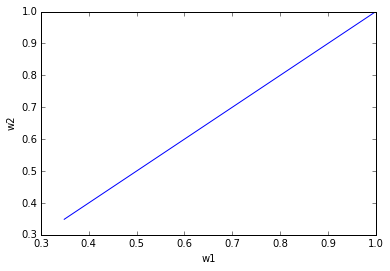

In [1]:
__author__ = 'mike.bowles'
import matplotlib.pyplot as plot
%matplotlib inline
#define a two-dimensional optimization problem
#quadratic form in w1, w2

def J(w1, w2, a11, a22):
    return 0.5 * (w1 * w1 * a11 + w2 * w2 * a22)

def gradJ(w1, w2, a11, a22):
    return [w1 * a11, w2 * a22]


#pick problem parameters
a11 = 100.0
a22 = 1.0

#initialize weights
w1 = 1.0
w2 = 1.0

#set meta parameters
stepSize = 0.1
nSteps = 10

#data structures to store results
jList = []
w1List = []
w2List = []

jList.append(J(w1, w2, a11, a22))
w1List.append(w1)
w2List.append(w2)

for i in range(nSteps):
    deltaW = gradJ(w1, w2, a11, a22)
    w1 += - stepSize * deltaW[0]
    w2 += - stepSize * deltaW[1]

    #store new values for plotting
    jList.append(J(w1, w2, a11, a22))
    w1List.append(w1)
    w2List.append(w2)

plot.plot(range(len(jList)), jList)
plot.xlabel('Number of Gradient Steps')
plot.ylabel('J - Performance')
plot.show()

plot.plot(w1List, w2List)
plot.xlabel('w1')
plot.ylabel('w2')
plot.show()

Q's
1.  In the code above change e1 from 1 to 100 and rerun.  What happens to J?  How would you characterize the behavior?  
2.  With e1 = 1.0 and w1 = w2 = 1.0 what is the gradient of J wrt w1 and w2?  How about with e1 = 100?
3.  What would you do to improve the performance of your optimizer?  
4.  What new problems arise from fixing the divergence problem?


#Newton's method - For the curious

In the example above, the function J had a very simple form.  The matrix in the quadratic form was diagonal and the minimum was at $w1 = w2 = 0$.  Life is seldom that gentle.  A more general circumstance is something like

$J = b^Tw + \frac12 w^TAw$

where b is a vector and A is a positive definite symmetric matrix. 

Q's  
1.  What is the gradient of J wrt w?  

2.  What is value of w that solves $\nabla J = b + Aw = 0$?

Terminology:  The Hessian of a function is a symmetric matrix of all the second order partial derivatives.  

$Hessian(J(w))_{i,j} = \frac{\delta^2J}{\delta w_i\delta w_j}$

Q's
1. What's the Hessian of $J = b^Tw + \frac12 w^TAw$ ?

Suppose you're given a problem that is quadratic but you don't know the values for b and A, but you can calculate the gradient and the Hessian at any point w.  You initialize the weights to $w^0$ and are looking for the step $\Delta$ that will get you closer to minimizing J.  You have the gradient of J at $w^0$ and the Hessian of J (the matrix A).  And you wish to find the step $\Delta$ that satisfies 

$\nabla J(w^0 + \Delta) = b + A(w^0 + \Delta) = 0$

Given the gradient evaluated at $w^0$ and the Hessian A.  The gradient of $\nabla J(w^0) = b + Aw^0$

which means that 
$\nabla J(w^0 + \Delta) = b + A(w^0 + \Delta) = \nabla J(w^0) + A\Delta$

So
$\Delta = A^{-1} \nabla J(w^0)$

Q's
1.  What is $A^{-1}$ for the code example above?
2.  What is the effect of multiplying the gradient times $A^{-1}$

Coding Exercise 1:
Modify the code above to incorporate Newton's method.  Comment on your results.


#Notes on the generality of the quadratic form example

1.  Not all minimization problems are quadratic.  Quadratic is very often a good local approximation for problems where the second derivatives exist.  General problems will require recalculating the Hessian matrix each time a step is taken whereas the Hessian for a quadratic problem is a constant.  

2.  Not all problems are diagonal.  A symmetric positive definite matrix can be diagonalized by rotating the coordinate frame.  The example considered the problem in a reference frame where the Hessian matrix was diagonal, but the conclusions regarding convergence and its dependence on the relative magnitudes of the entries in the diagonal version of the Hessian matrix are true for more general matrices.  

3.  The spread of diagonal entries (1 and 100) is unrealistically large.  Experience suggests that the spread of the diagonal entries is usually much much larger than 100 - particularly as the dimensionality of problems grows.  

##Improved first order optimization methods

First order methods are ones that only use gradient calculations.  They are called first order because they only require taking the first derivative.  Newton's method is a second order method because it requires taking two derivatives.  Why not use Newton's method?  The example above was a 2-dimensional problem.  There are two weights to determine.  That required calculating 2 terms in the gradient and 4 terms for the Hessian.  (The Hessian is symmetric so technically it required dim * (dim + 1) / 2 = 3 terms.)  If the problem is 100 dimensional, then the gradient requires 100 calculations and the Hessian is about $\frac12100^2$ and it is not unusual to have many thousands of parameters in neural net problems.  In addition Newton's method won't work if the problem doesn't have second derivatives (absolute value function, for example).  It's worthwhile to understand Newton's method because it helps to illustrate the short-comings of first order methods and because we'll in a later lecture we'll look at some minimization methods that try to construct second order information from first order calculations.  Now we're going to look at some methods that use the gradient calculation but attempt to overcome the limitations that you've seen and will converge more quickly than gradient descent.  You'll get to prove that to yourself soon enough.  

#Backtracking Line Search
The basic problem of taking steps that are too big can be overcome by adjusting the step each time a step is taken.  Backtracking line search is a simple yet effective method for doing this.  The wikipedia page on the subject has a good description.  https://en.wikipedia.org/wiki/Backtracking_line_search 

The code block below shows the implementation of backtracking line search on the quadratic problem.  


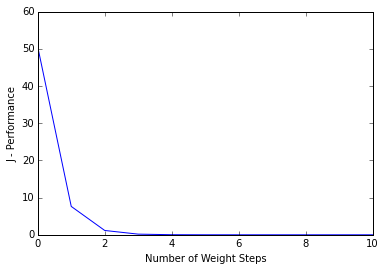

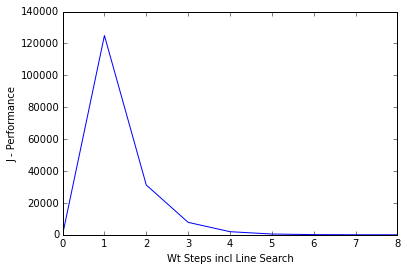

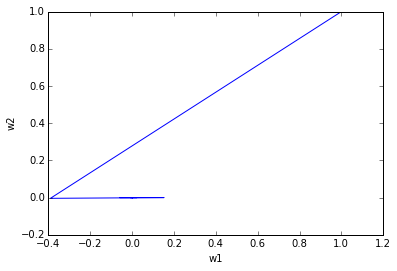

In [1]:
__author__ = 'mike.bowles'
import matplotlib.pyplot as plot
%matplotlib inline
#define a two-dimensional optimization problem
#quadratic form in w1, w2

def J(w1, w2, a11, a22):
    return 0.5 * (w1 * w1 * a11 + w2 * w2 * a22)

def gradJ(w1, w2, a11, a22):
    return [w1 * a11, w2 * a22]


#pick problem parameters
a11 = 100.0
a22 = 1.0

#initialize weights
w1 = 1.0
w2 = 1.0

#set meta parameters
nSteps = 10
#pick c in (0, 1)
c = 0.5
#pick tau in (0, 1)
tau = 0.5
#pick starting step size to be 1.0
alpha = 1.0
#alpha = 0.1


#data structures to store results
jList = []
jListFull = []
w1List = []
w2List = []

jList.append(J(w1, w2, a11, a22))
jListFull.append(J(w1, w2, a11, a22))
w1List.append(w1)
w2List.append(w2)

for i in range(nSteps):
    gradW = gradJ(w1, w2, a11, a22)
    #define search direction to be negative of gradient direction
    p = [-x for x in gradW]
    #calculate m = p^T gradW
    m = sum([a*b for (a,b) in zip(p, gradW)])


    #try values of alpha and halve them if they don't pass Armijo's condition
    w1Temp = w1 + alpha * p[0]; w2Temp = w2 + alpha * p[1]
    jTemp = J(w1Temp, w2Temp, a11, a22)
    jOld = J(w1, w2, a11, a22)
    while jTemp > jOld + alpha * c * m:
        alpha = tau * alpha
        w1Temp = alpha * p[0]; w2Temp = alpha * p[1]
        jTemp = J(w1Temp, w2Temp, a11, a22)
        jListFull.append(jTemp)

    #update w1 and w2 and iterate
    w1 = alpha * p[0]; w2 = alpha * p[1]



    #store new values for plotting
    jList.append(J(w1, w2, a11, a22))
    w1List.append(w1)
    w2List.append(w2)

plot.plot(range(len(jList)), jList)
plot.xlabel('Number of Weight Steps')
plot.ylabel('J - Performance')
plot.show()

plot.plot(range(len(jListFull)), jListFull)
plot.xlabel('Wt Steps incl Line Search')
plot.ylabel('J - Performance')
plot.show()

plot.plot(w1List, w2List)
plot.xlabel('w1')
plot.ylabel('w2')
plot.show()


#Momentum Method

The idea behind the momentum method is that in the steep directions the gradient steps may overshoot to one side and then the other, whereas in the shallow directions they plod along in the same direction.  That suggests that averaging the steps before taking more steps in order to average out the sign-changing fluctuations and build up the step size in the shallow, steady directions.  That leads to a fairly simple adjustment.  

$Step_{i+1} = \beta Step_i - (1 - \beta)\delta\nabla J_i$

and

$w_{i+1} = w_i + Step_{i+1}$

The second of these two equations says that the adjustment to the weight vector is the vector called "Step".  Step depends on two things.  One is the gradient vector and the other is Step at the last stage.  The scalar parameters $\beta$ and $\delta$ are called "meta parameters".  These are parameters you set and adjust in the process of solving your numerical minimization problem.

The parameter $\beta$ controls how much the next step depends on the last one.  If $\beta = 0$, then there's no dependence on the last step and the update becomes ordinary gradient descent with $\delta$ as the gradient step size.  At the other extreme, if $\beta = 1$, then the actual gradient calculation.  The parameters $\beta$ dictates how long the momentum process remembers past values.  Step values n steps in the past are weighted by $\beta^n$.  For example, if $\beta = 0.95$ (large but not unreasonably large) then new steps still reflect approximately 50% of Steps taken 13 steps in the past ($0.95^{13} = 0.51$).  

Not that you may also see the momentum equation parameterized as follows.  

$Step_{i+1} = \alpha Step_i - \epsilon\nabla J_i$

The two are equivalent.  The first method makes adjustment of the two parameters a little more independent.  You'll get a chance to try them both in the example neural net that you saw in the last lecture.  The code below shows the application of the momentum method to minimizing the quadratic problem above.  

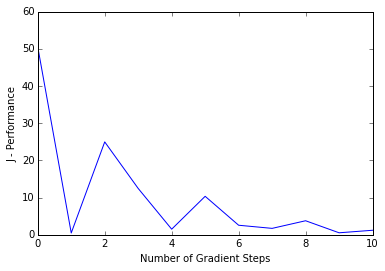

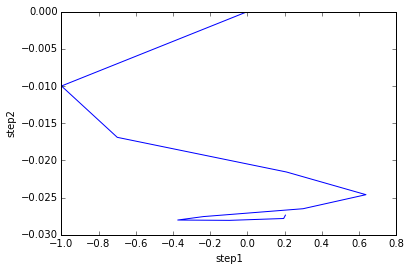

In [1]:
__author__ = 'mike.bowles'
import matplotlib.pyplot as plot
%matplotlib inline
#define a two-dimensional optimization problem
#quadratic form in w1, w2

def J(w1, w2, a11, a22):
    return 0.5 * (w1 * w1 * a11 + w2 * w2 * a22)

def gradJ(w1, w2, a11, a22):
    return [w1 * a11, w2 * a22]


#pick problem parameters
a11 = 100.0
a22 = 1.0

#initialize weights and steps
w1 = 1.0
w2 = 1.0
step1 = 0.0
step2 = 0.0

#set meta parameters
nSteps = 10
alpha = 0.7
epsilon = 0.01

#data structures to store results
jList = []
step1List = []
step2List = []

jList.append(J(w1, w2, a11, a22))
step1List.append(step1)
step2List.append(step2)


for i in range(nSteps):
    #update steps
    deltaW = gradJ(w1, w2, a11, a22)
    step1 = alpha * step1 - epsilon * deltaW[0]
    step2 = alpha * step2 - epsilon * deltaW[1]

    #update weights
    w1 += step1
    w2 += step2

    #store new values for plotting
    jList.append(J(w1, w2, a11, a22))
    step1List.append(step1)
    step2List.append(step2)

plot.plot(range(len(jList)), jList)
plot.xlabel('Number of Gradient Steps')
plot.ylabel('J - Performance')
plot.show()

plot.plot(step1List, step2List)
plot.xlabel('step1')
plot.ylabel('step2')
plot.show()

As you can see from the attached plots, using the momentum method (with a little tuning) converges the weights more rapidly than gradient descent when there's a wide span in the magnitude of the diagonal entries in the quadratic form of this simple example.  

Coding Exercise 2:
Incorporate the momentum method into the the simple neural net code from the last lecture.  

#Nesterov's accelerated gradient descent (NAG)

Nesterov's method is another method for adjusting gradient descent for faster, surer convergence.  NAG has fewer parameters to adjust than momentum method and comes with theoretical proof of quadratic convergence.  The notation and equations below, follow the format in 
https://blogs.princeton.edu/imabandit/2013/04/01/acceleratedgradientdescent/ . That blog post has references to convergence proofs for those who yearn for more details.  

The method requires that the function being minimized be "Lipschitz smooth".  That requires some explanation.  The wiki page https://en.wikipedia.org/wiki/Lipschitz_continuity gives a solid, intuitive description.  Basically, a Lipschitz smooth function is a little like being differentiable with a bounded derivative.  The Lipschitz smooth function is not required to be differentiable, but it is required to have a bound on how fast it changes values.  

That bound is the only free parameter in NAG.  Here are the equations describing NAG in general.  They follow the reference above with the substitution of "i" for "s", "J" for "f" and "w" for "x" in order to make the application to the examples clearer.  Define scalar sequences $\lambda_i$ and $\gamma_i$ as 

$\lambda_0 = 0.0$,
$\lambda_{i} = \frac{1 + \sqrt{1 + 4\lambda^2_{i-1}}}{2}$, 
$\gamma_{i} = \frac{1 - \lambda_i}{\lambda_{i+1}}$

The two vectors $y_i$ and $w_i$ describe the gradient-based updates.  

$\begin{equation}y_i = w_i - \frac{1}{\beta}\nabla J(w_i)\\ w_{i+1} = (1 - \gamma_{i})y_{i+1} + \gamma_i y_i\end{equation}$

The only parameter required for NAG is the Lipschitz bound $\beta$.  For the diagonalized quadratic problem in our example, it's easy to calculate by assessing the maximum value on the diagonal for the quadratic form example.  For a non-diagonalized quadratic problem with square symmetric positive definite matrix A of dimension n, you can bound the Lipschitz constant by 

Lipschitz Constant $\beta$ = maximum eigenvalue(A) 
$\leq$ tr(A) = $\sum\limits_{i=1}^n a_{ii}$

For problems that aren't conveniently quadratic forms you can get a feel for it's value in more general problems by looking at the change in the magnitude of the gradient compared to the change in the magnitude of the weights. 

Here's how NAG works on our simple example problem.


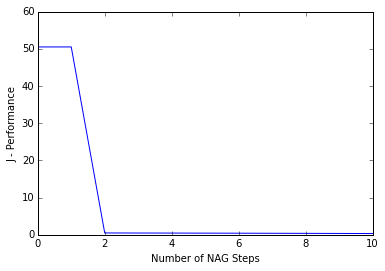

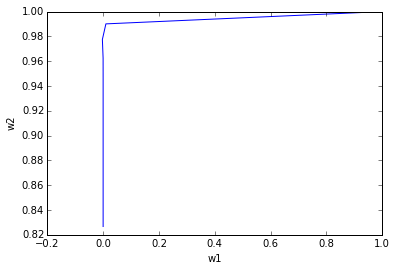

In [1]:
__author__ = 'mike.bowles'
import matplotlib.pyplot as plot
import math
%matplotlib inline
#define a two-dimensional optimization problem
#quadratic form in w1, w2

def J(w1, w2, a11, a22):
    return 0.5 * (w1 * w1 * a11 + w2 * w2 * a22)

def gradJ(w1, w2, a11, a22):
    return [w1 * a11, w2 * a22]

def lambdaUpdate(lambdai):
    return 0.5 * (1 + math.sqrt(1 + 4 * lambdai * lambdai))

def gammai(lambdai, lambdaip1):
    return (1 - lambdai) / lambdaip1


#pick problem parameters
a11 = 100.0
a22 = 1.0

#use trace to upper bound the diagonal
beta = a11 + a22

#initialize y's and weights
y1 = 1.0
y2 = 1.0
w1 = y1
w2 = y2

#initialize scalar sequences
lambLast = 0.0
lambNext = 1.0
gamma = gammai(lambLast, lambNext)


#set meta parameters
nSteps = 10


#data structures to store results
jList = []
w1List = []
w2List = []

jList.append(J(w1, w2, a11, a22))
w1List.append(w1)
w2List.append(w2)


for i in range(nSteps):
    #update steps
    grad = gradJ(w1, w2, a11, a22)
    y1Next = w1 - grad[0]/beta
    y2Next = w2 - grad[1]/beta

    #update weights
    w1 = (1 - gamma) * y1Next + gamma * y1
    w2 = (1 - gamma) * y2Next + gamma * y2

    #store new values for plotting
    jList.append(J(w1, w2, a11, a22))
    w1List.append(w1)
    w2List.append(w2)

    #update lambda and gamma and y
    lambLast = lambNext
    lambNext = lambdaUpdate(lambLast)
    gamma = gammai(lambLast, lambNext)
    y1 = y1Next
    y2 = y2Next

plot.plot(range(len(jList)), jList)
plot.xlabel('Number of NAG Steps')
plot.ylabel('J - Performance')
plot.show()

plot.plot(w1List, w2List)
plot.xlabel('w1')
plot.ylabel('w2')
plot.show()

#Homework Exercise

Reprogram the simple ANN classifier to use NAG for weight updates.